# Training a model from multiple images
Use multiple images to train a model with more parameters. We will first create a model from a single image, then segment a number of images that we finally use for training a larger model.

In [21]:
# Import the modules needed 
import insegtpy
import insegtpy.models
from insegtpy.models.gaussmulti import GaussMultiImage
import skimage.io
import matplotlib.pyplot as plt
import PIL
import numpy as np
import os
import glob
import pickle
import time

%matplotlib notebook

In [26]:
# Choose a number of images to train the model
im_dir = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/train_images/'
label_dir = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/train_labels/'


n_im = 20

images = []
labels = []

im_names = sorted(glob.glob(im_dir + '*.png'))
label_names = sorted(glob.glob(label_dir + '*.png'))
idx = np.random.permutation(len(im_names))[:n_im]


for i in idx:
    images.append(skimage.io.imread(im_names[i])/255.0)
    labels.append((skimage.io.imread(label_names[i])/255).astype(np.uint8)+1)


Number of images 1
Number of training patches 40000
Number of layers 5 number of elements 3905


<IPython.core.display.Javascript object>


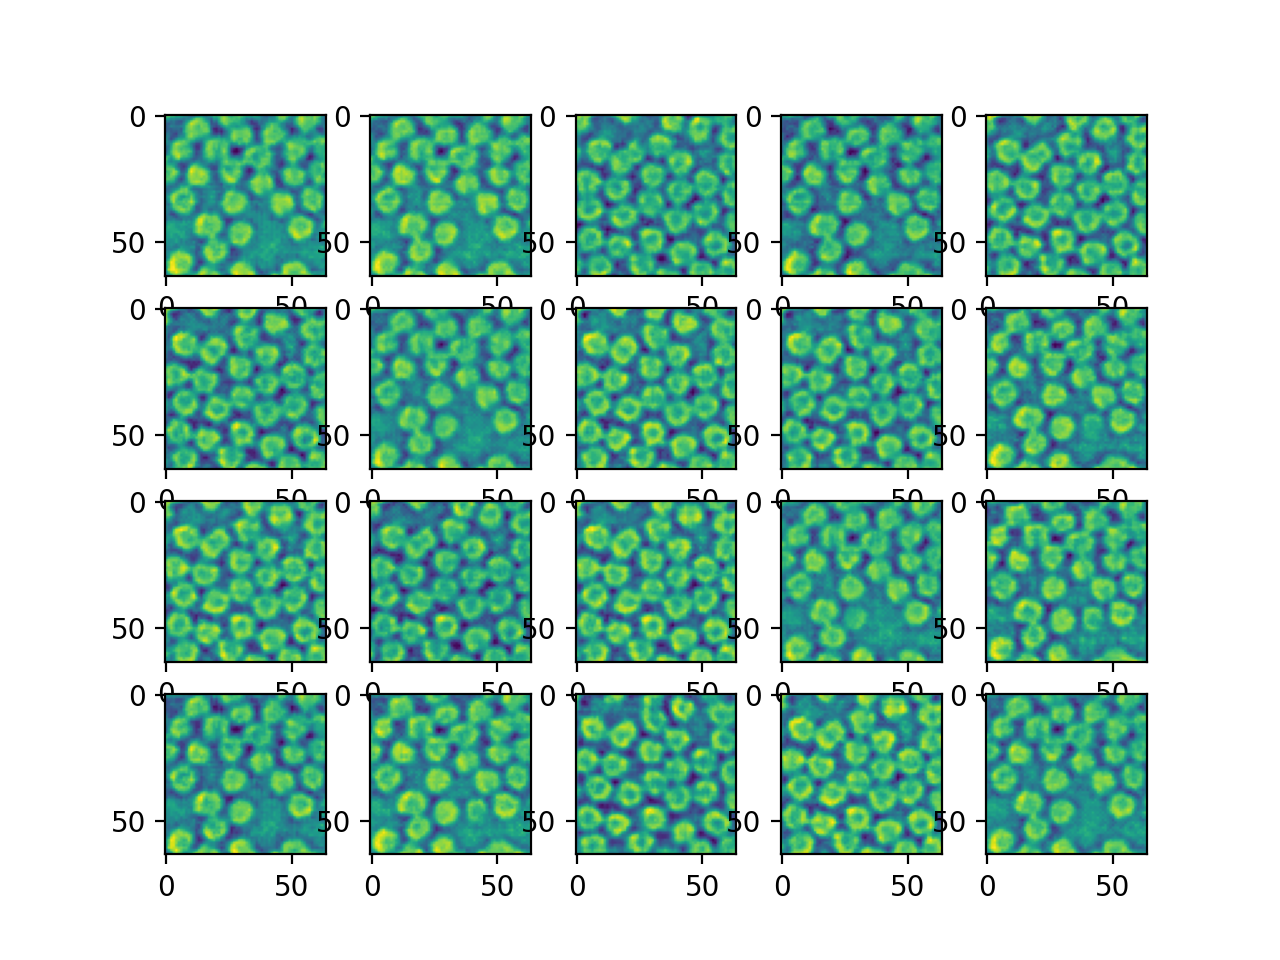

<IPython.core.display.Javascript object>


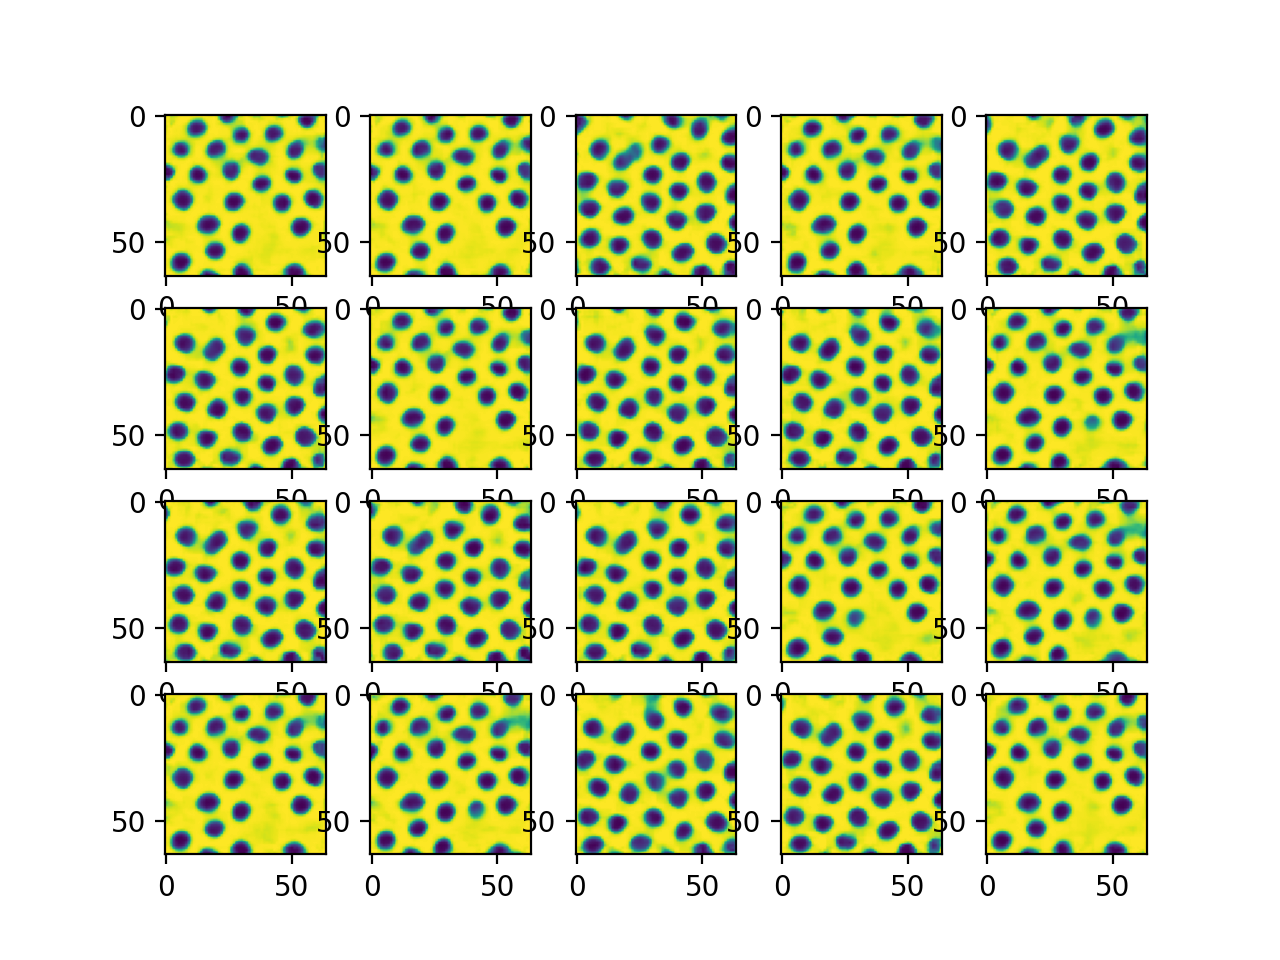

<IPython.core.display.Javascript object>


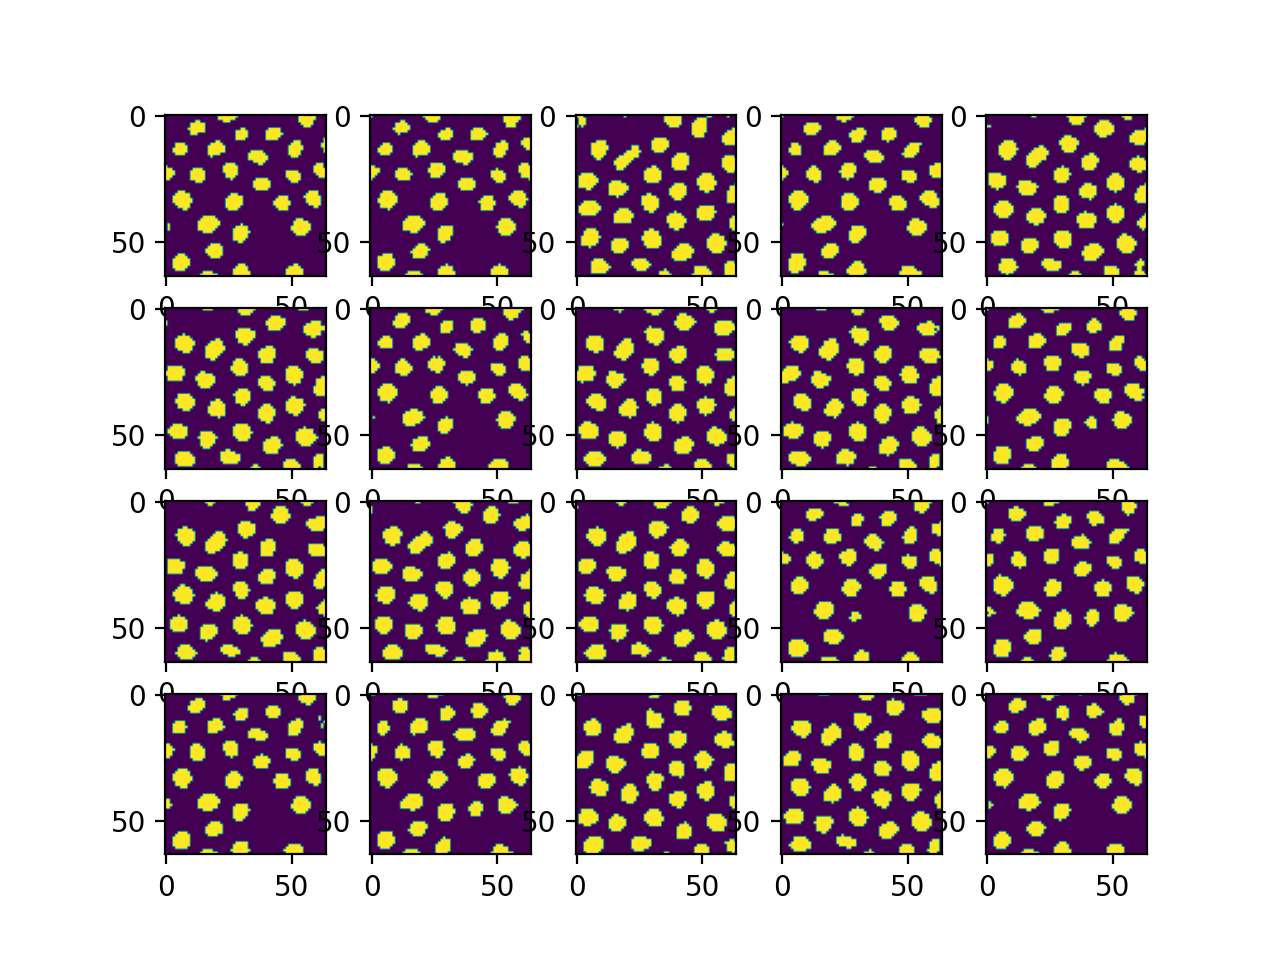

In [27]:
# Train model from multiple images

model = GaussMultiImage(scales = [1], sigmas = [1,2], n_feat_per_image=2000,
                        branching_factor=5, number_layers=5, propagation_size=9, nr_labels = 2)

model.compute_dictionary(images, labels)
prob = model.dict_prop_sc.dictprob_to_improb_scales(model.assignments_list)

# Show the result

fig, ax = plt.subplots(4,5)
ax = ax.ravel()
for im, axs in zip(images, ax):
    axs.imshow(im)

fig, ax = plt.subplots(4,5)
ax = ax.ravel()
for probability, axs in zip(prob, ax):
    axs.imshow(probability[0])

fig, ax = plt.subplots(4,5)
ax = ax.ravel()
for label, axs in zip(labels, ax):
    axs.imshow(label)


In [13]:
# Run the model on a single volume and save the result

im_dir = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/Group_0/'
im_names = sorted(glob.glob(os.path.join(im_dir, '*.tiff')))

out_dir ='/Users/abda/Documents/Center/QIM/data/20220408_fibers/output_two_cls/'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir[:-1])

V_prob = np.zeros((len(im_names), images[0].shape[0], images[0].shape[0]))

for i, im_name in enumerate(im_names):
    p = model.segment_new(skimage.io.imread(im_name)/255.0)
    V_prob[i] = p[1]*255
    
skimage.io.imsave(out_dir + 'vol_prob.tif', V_prob.astype(np.uint8))



In [20]:
# Save the trained model

dir_out = '/Users/abda/Documents/Center/QIM/data/20220408_fibers/model/'
model_file_name = 'multi_segmentation_two_class_model_1.pkl'
if not os.path.isfile(os.path.join(dir_out, model_file_name)):
    with open(os.path.join(dir_out, model_file_name), 'wb') as f:
        pickle.dump(model, f)
    print('Model saved')
else:
    print(f'File: {dir_out+model_file_name} already exists. Choose another name!')

Model saved
